## ✅ This Project Contains the Following Sections:

*   Importing Libraries
*   Loading The Dataset
*   Understanding The Dataset
*   Data Cleaning
*   Data Visualization

# 🔵 Importing Libraries


In [26]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency



# 🔵 Loading the Dataset

In [27]:
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Input/Ecommerce 2024'

file_names = os.listdir(folder_path)

if os.path.exists(folder_path):
    file_names = os.listdir(folder_path)
    print("Files in folder:")
    for file_name in file_names:
        print(file_name)
else:
    print(f"Folder not found: {folder_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder:
product_details.csv
E-commerece sales data 2024.csv
customer_details.csv


In [28]:
df_customer=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input/Ecommerce 2024/customer_details.csv')

#🔵  Understanding the Dataset

In [29]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [30]:
df_customer.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [31]:
df_customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [32]:
print(df_customer.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


#🔵 Data Cleaning


Consistant Column Name

In [33]:
df_customer.columns = df_customer.columns.str.lower().str.replace(" ", "_")

print(df_customer)

      customer_id  age  gender item_purchased     category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      purchase_amount_(usd)       location size      color  season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [34]:
# Convert 'Yes'/'No' to 1/0 for discount_applied
df_customer['discount_applied'] = df_customer['discount_applied'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'Yes'/'No' to 1/0 for promo_code_used
df_customer['promo_code_used'] = df_customer['promo_code_used'].apply(lambda x: 1 if x == 'Yes' else 0)


Check Unique Values and Count

In [35]:
for column in df_customer.columns:
    print(f"Unique values in '{column}':")
    print(df_customer[column].unique())
    print(f"'{column}' unique value count:")
    print(df_customer[column].nunique())
    print("\n")

Unique values in 'customer_id':
[   1    2    3 ... 3898 3899 3900]
'customer_id' unique value count:
3900


Unique values in 'age':
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
'age' unique value count:
53


Unique values in 'gender':
['Male' 'Female']
'gender' unique value count:
2


Unique values in 'item_purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
'item_purchased' unique value count:
25


Unique values in 'category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
'category' unique value count:
4


Unique values in 'purchase_amount_(usd)':
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 1

#🔵 Data Visualization





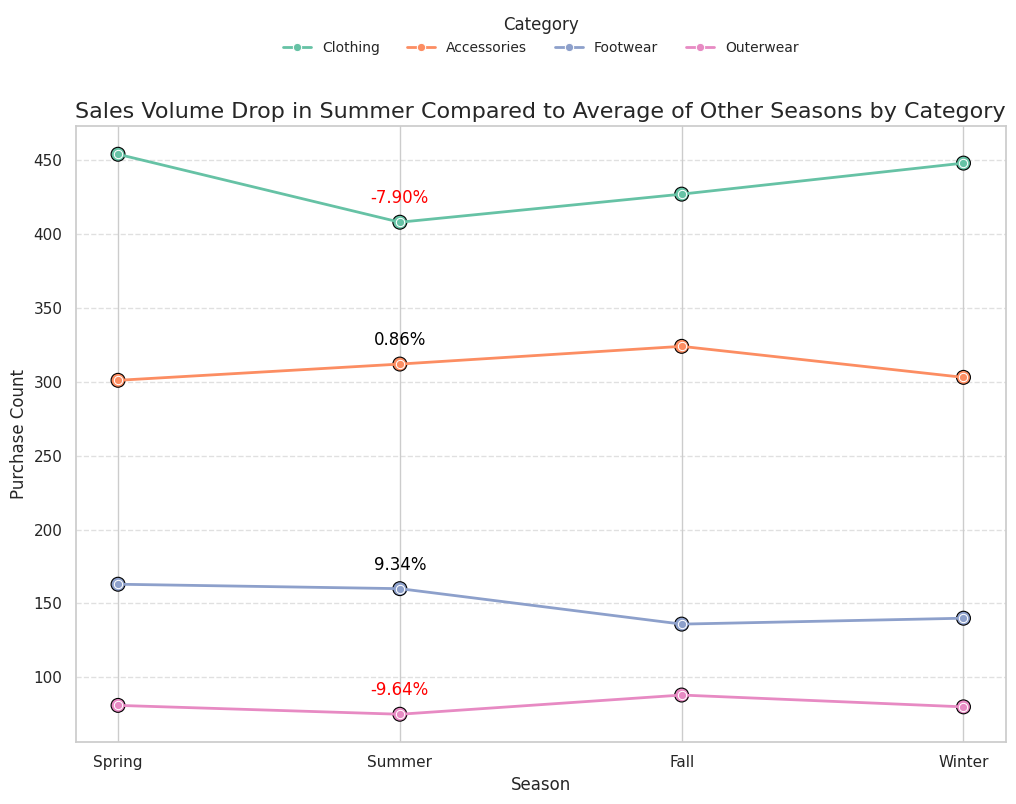

In [72]:
plt.figure(figsize=(12, 8))

percentage_drops_avg = {}

for category in category_order:
    category_data = seasonal_category_stats[
        seasonal_category_stats["category"] == category
    ]

    sales_by_season = category_data.set_index("season")["purchase_count_category"].to_dict()

    other_seasons_avg = sum([sales_by_season.get(season, 0) for season in ["Spring", "Fall", "Winter"]]) / 3

    if "Summer" in sales_by_season and other_seasons_avg > 0:
        drop_percentage = ((sales_by_season["Summer"] - other_seasons_avg) / other_seasons_avg) * 100
        percentage_drops_avg[category] = drop_percentage

    sns.lineplot(
        data=category_data,
        x="season",
        y="purchase_count_category",
        label=category,
        marker="o",
        linewidth=2,
        color=sns.color_palette("Set2", n_colors=len(category_order))[
            category_order.index(category)
        ],
    )

sns.scatterplot(
    data=seasonal_category_stats,
    x="season",
    y="purchase_count_category",
    hue="category",
    palette="Set2",
    legend=False,
    s=100,
    edgecolor="black",
)

for category, drop_percentage in percentage_drops_avg.items():
    category_data = seasonal_category_stats[
        seasonal_category_stats["category"] == category
    ]
    summer_data = category_data[category_data["season"] == "Summer"]

    if not summer_data.empty:
        label_color = "red" if drop_percentage < 0 else "black"
        plt.text(
            x=summer_data["season"].values[0],
            y=summer_data["purchase_count_category"].values[0] + 10,
            s=f"{drop_percentage:.2f}%",
            color=label_color,
            ha="center",
            va="bottom",
            fontsize=12
        )

plt.title("Sales Volume Drop in Summer Compared to Average of Other Seasons by Category", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Purchase Count", fontsize=12)

# Adjusted legend placement
plt.legend(title="Category", fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(category_order),frameon=False)

plt.grid(axis="y", linestyle="--", alpha=0.6)


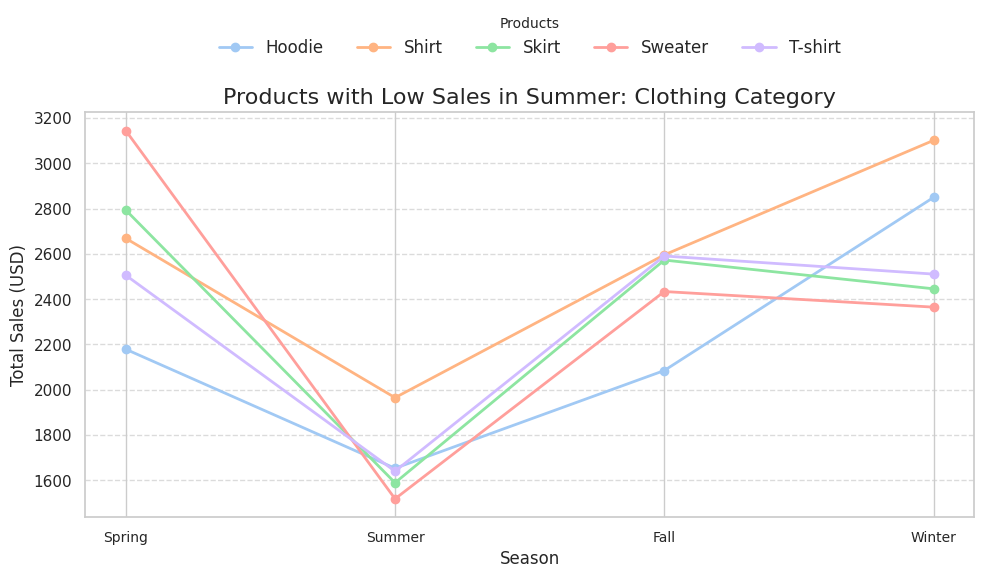

No products with the lowest sales in Summer to plot.



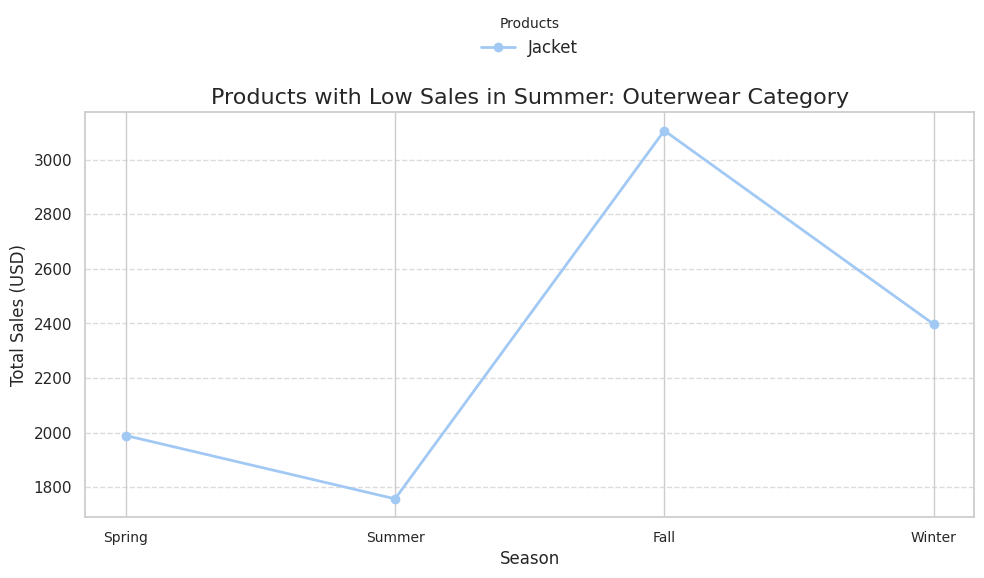

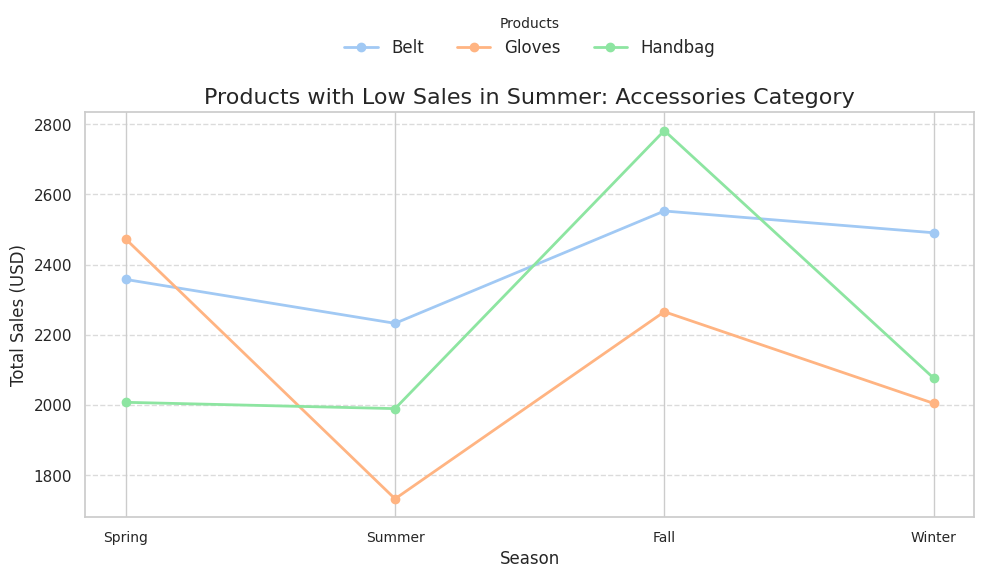

In [57]:
categories = df_customer["category"].unique()

for category in categories:
    category_data = df_customer[df_customer["category"] == category]

    aggregated_data = category_data.groupby(["item_purchased", "season"])["purchase_amount_(usd)"].sum().reset_index()

    summer_lowest_products = []

    for product in aggregated_data["item_purchased"].unique():
        product_data = aggregated_data[aggregated_data["item_purchased"] == product]

        summer_sales = product_data[product_data["season"] == "Summer"]["purchase_amount_(usd)"].values[0]

        other_seasons_sales = product_data[product_data["season"] != "Summer"]["purchase_amount_(usd)"].min()

        if summer_sales == min(summer_sales, other_seasons_sales):
            summer_lowest_products.append(product)

    filtered_data = aggregated_data[aggregated_data["item_purchased"].isin(summer_lowest_products)]

    pivot_data = filtered_data.pivot(index="item_purchased", columns="season", values="purchase_amount_(usd)").fillna(0)
    season_order = ["Spring", "Summer", "Fall", "Winter"]
    pivot_data = pivot_data.reindex(columns=season_order)

    if not pivot_data.empty:
        fig, ax = plt.subplots(figsize=(10, 6))

        pastel_colors = sns.color_palette("pastel", len(pivot_data))

        product_labels = []

        for idx, (row, color) in enumerate(zip(pivot_data.iterrows(), pastel_colors)):
            product = row[0]
            ax.plot(row[1].index, row[1].values, marker='o', label=product, linewidth=2, color=color)
            product_labels.append(product)

        ax.set_title(f"Products with Low Sales in Summer: {category} Category", fontsize=16)
        ax.set_ylabel("Total Sales (USD)", fontsize=12)
        ax.set_xlabel("Season", fontsize=12)
        ax.set_xticks(range(len(season_order)))
        ax.set_xticklabels([s.capitalize() for s in season_order], fontsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        ax.legend(
            title="Products",
            fontsize=12,
            title_fontsize=10,
            loc='lower center',
            bbox_to_anchor=(0.5, 1.1),
            ncol=len(product_labels),
            frameon=False
        )

        plt.tight_layout()
        plt.show()
    else:
        print("No products with the lowest sales in Summer to plot.\n")


## ⚪ Demographic Insights



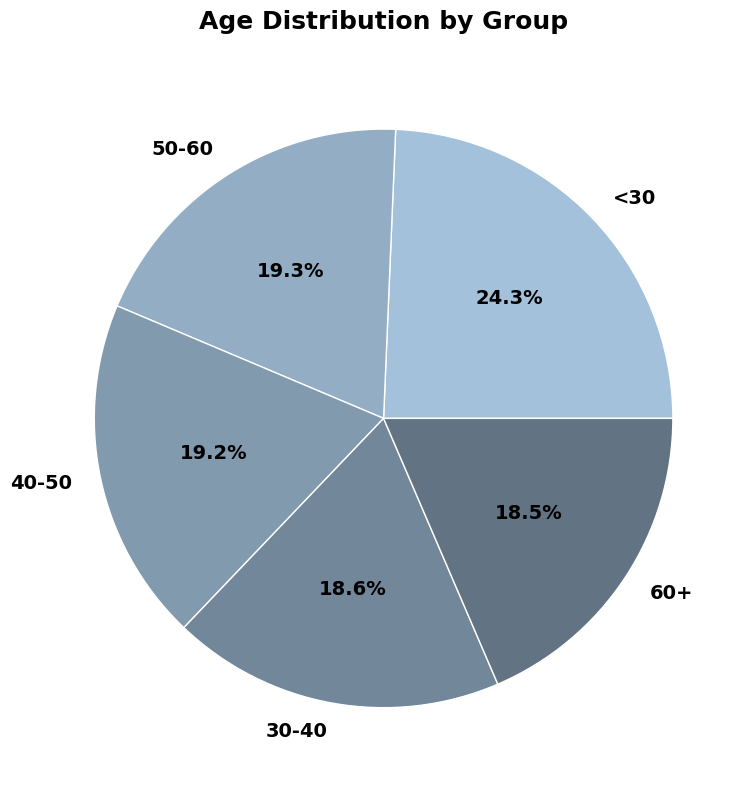

In [38]:
df_customer['age_group'] = pd.cut(
    df_customer['age'],
    bins=[0, 30, 40, 50, 60, 100],
    labels=['<30', '30-40', '40-50', '50-60', '60+']
)

age_group_counts = df_customer['age_group'].value_counts()

base_color_hls = mcolors.rgb_to_hsv(mcolors.to_rgb("#a3c1da"))

num_colors = len(age_group_counts)
shades = [
    mcolors.hsv_to_rgb((base_color_hls[0], base_color_hls[1], base_color_hls[2] * (1 - 0.1 * i)))
    for i in range(num_colors)
]

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(8, 8))
age_group_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=age_group_counts.index,
    colors=shades,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 14, 'fontweight': 'bold'},
)

plt.ylabel('')
plt.title('Age Distribution by Group', fontsize=18, weight='bold', pad=20)

plt.tight_layout()
plt.show()


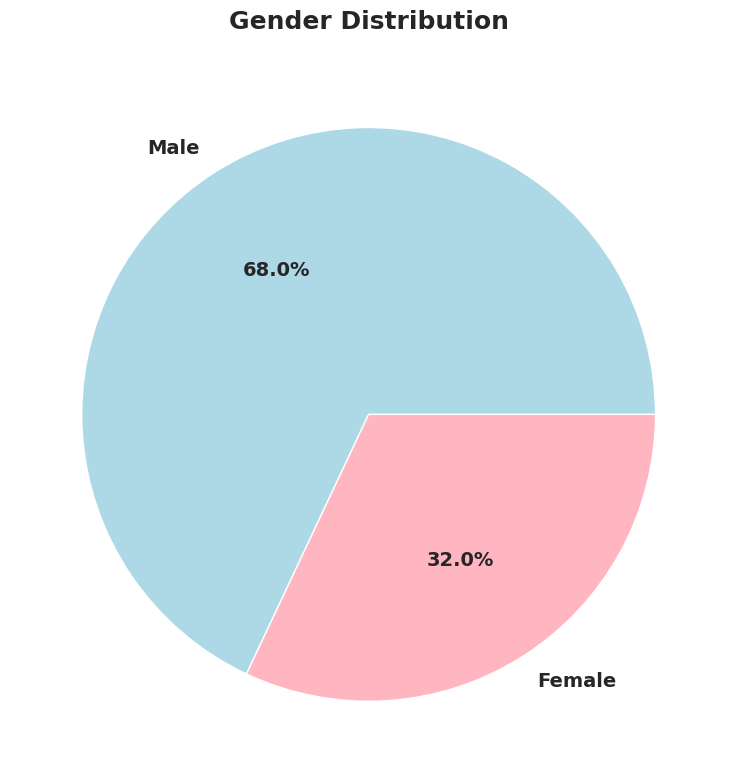

In [39]:
gender_counts = df_customer['gender'].value_counts()

colors = sns.color_palette("pastel")[0:2]
custom_colors = [
    (173 / 255, 216 / 255, 230 / 255),
    (255 / 255, 182 / 255, 193 / 255)
]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=custom_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

plt.title('Gender Distribution', fontsize=18, weight='bold', pad=20)

plt.tight_layout()
plt.show()


## ⚪ Sales by Demographic


🔗 [Back to Data Visualization](#scrollTo=v0qL151JzeXV&line=1&uniqifier=1)


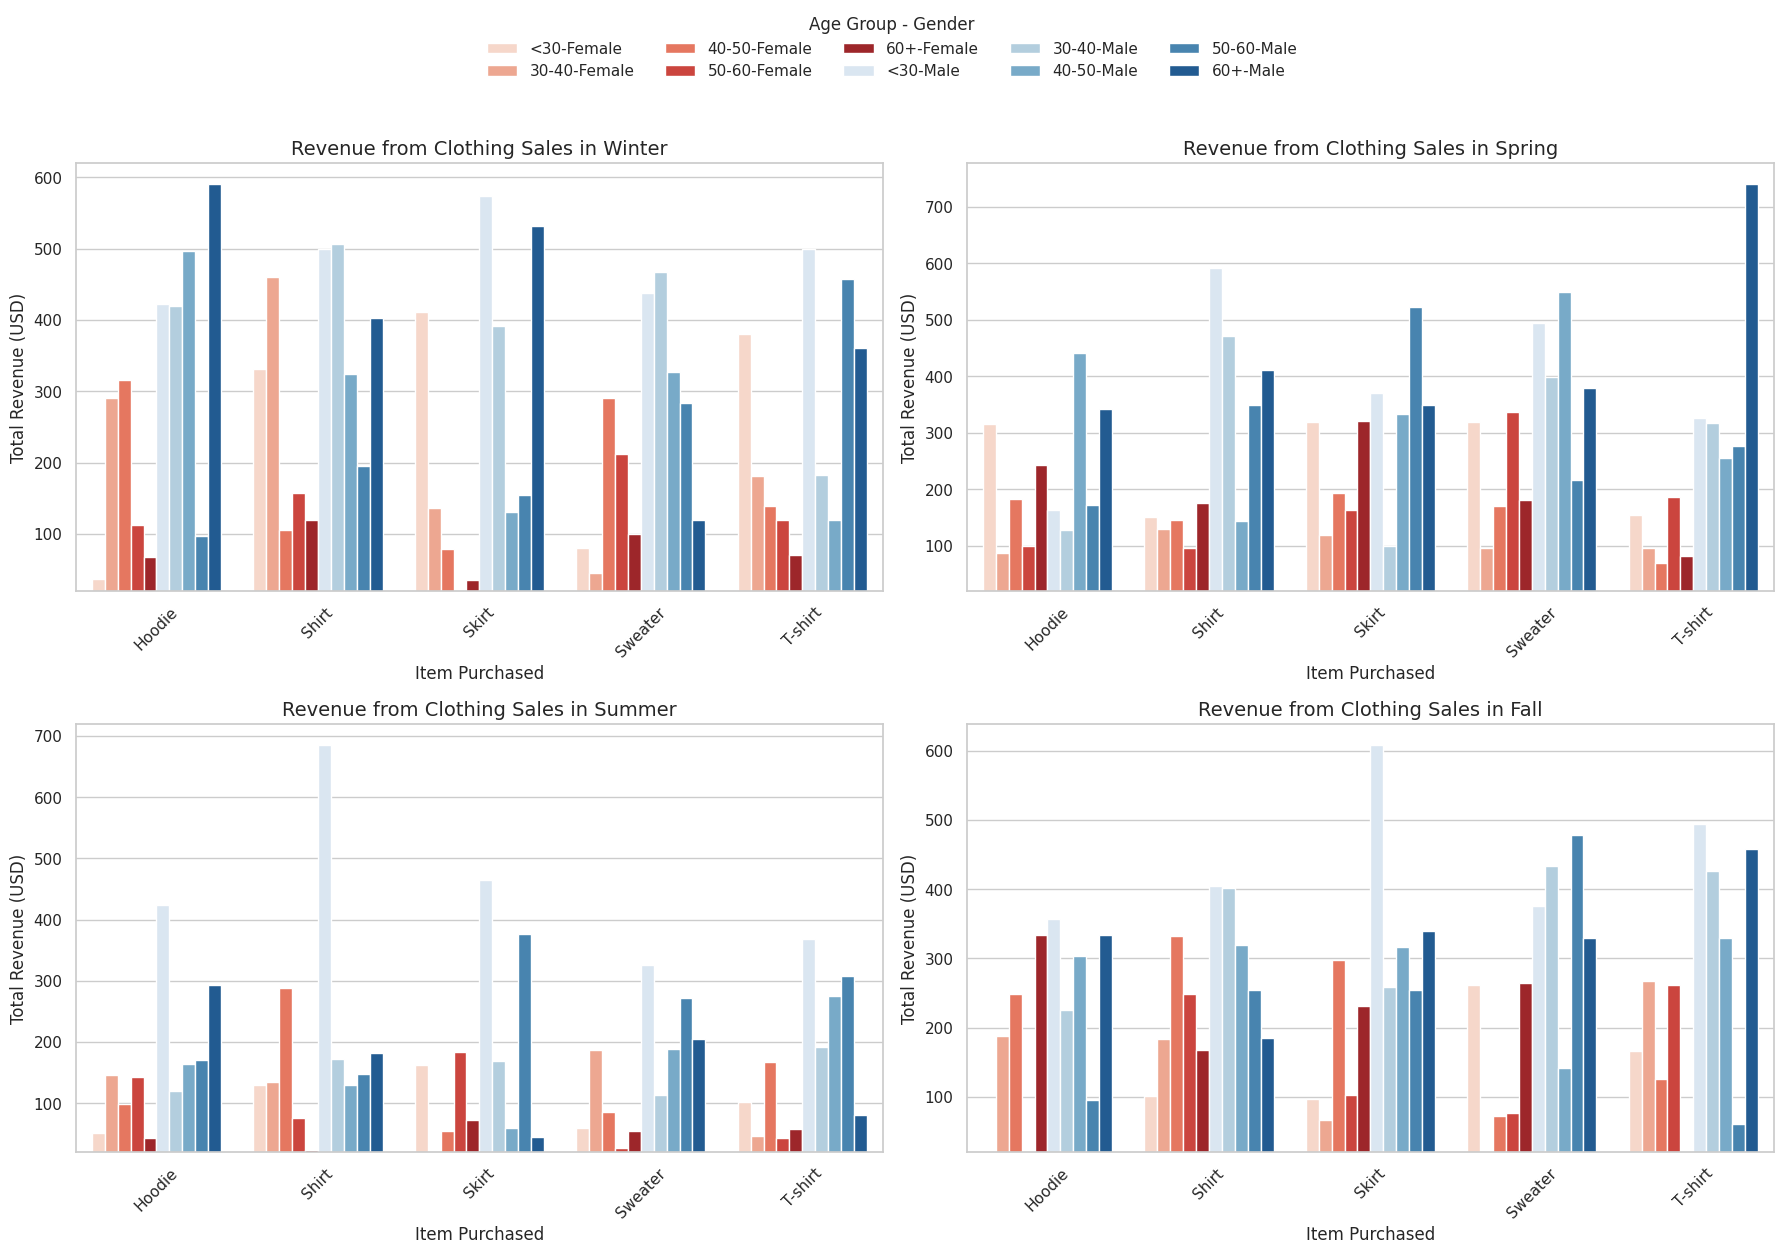

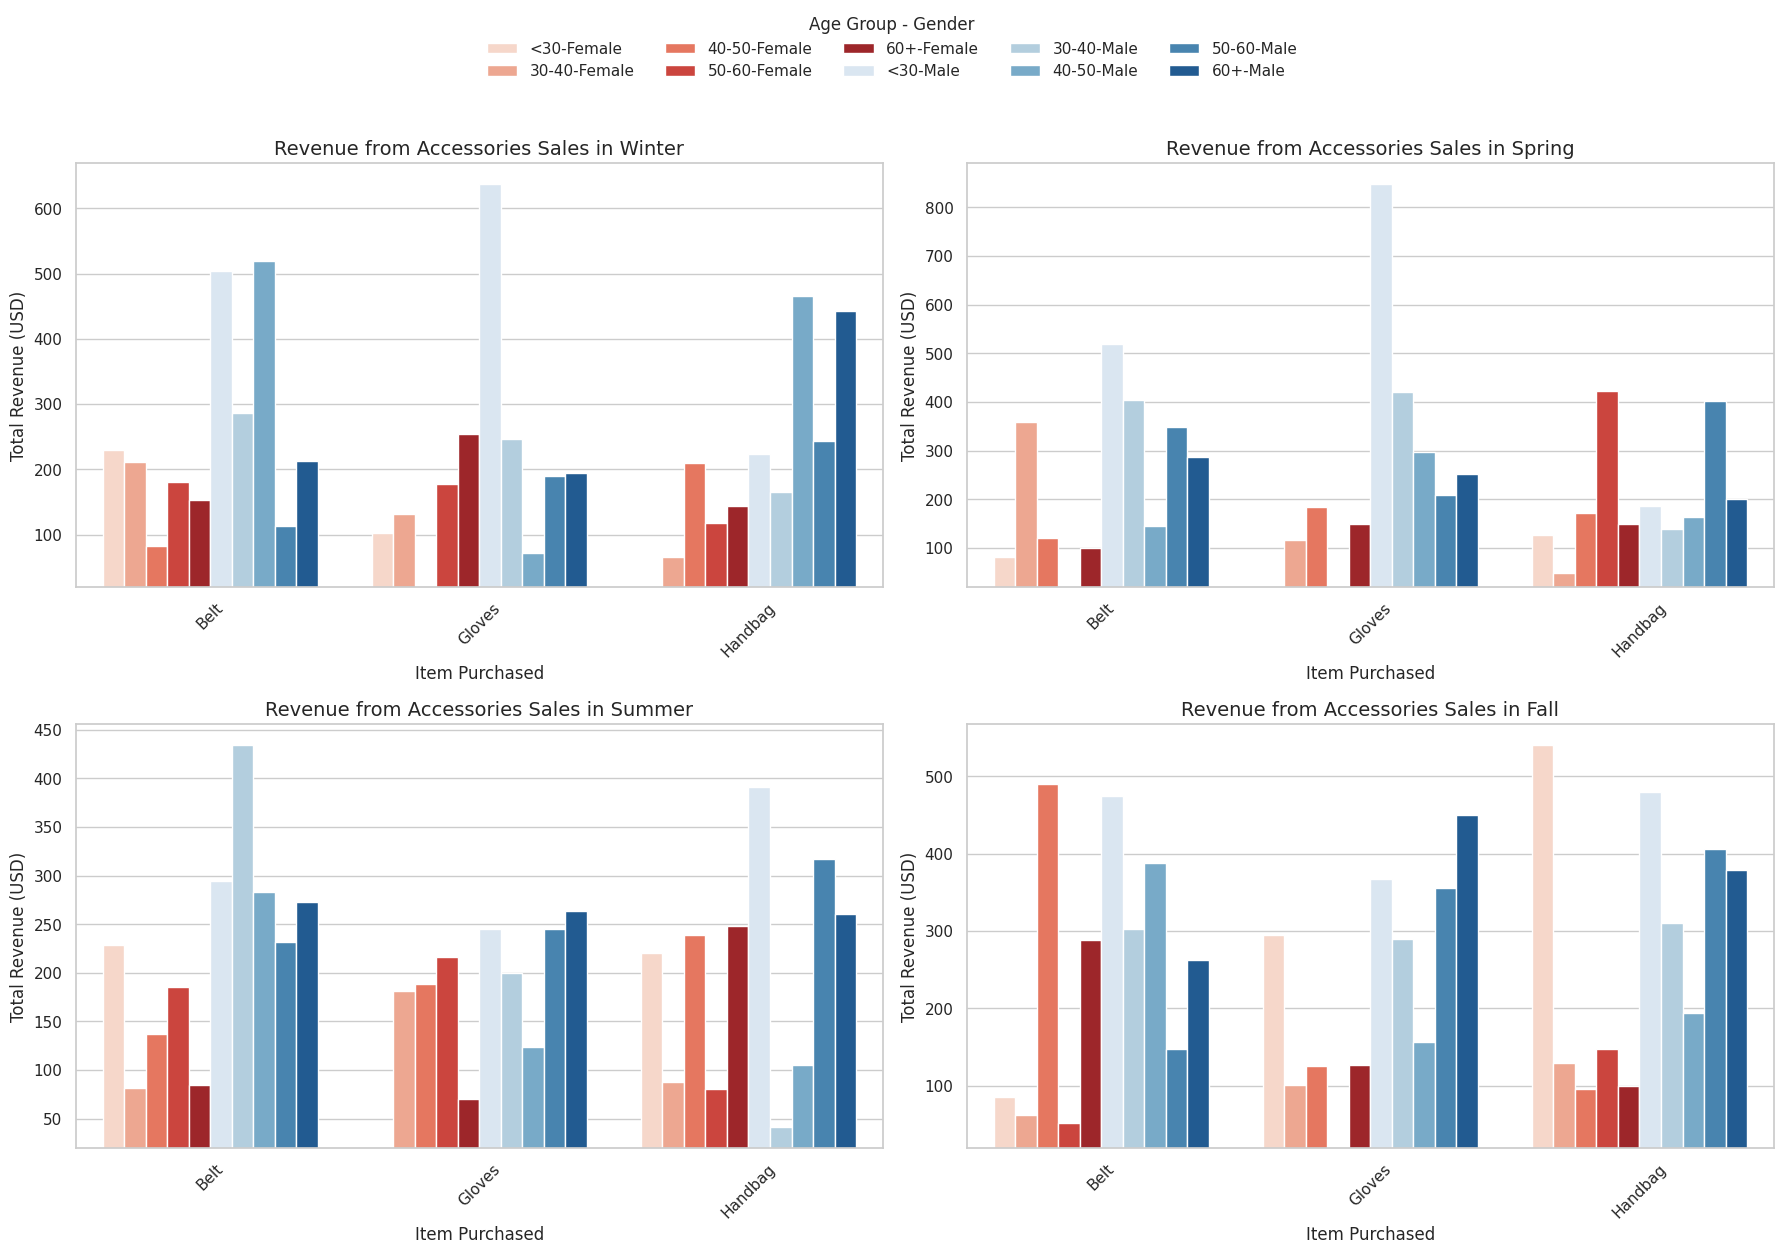

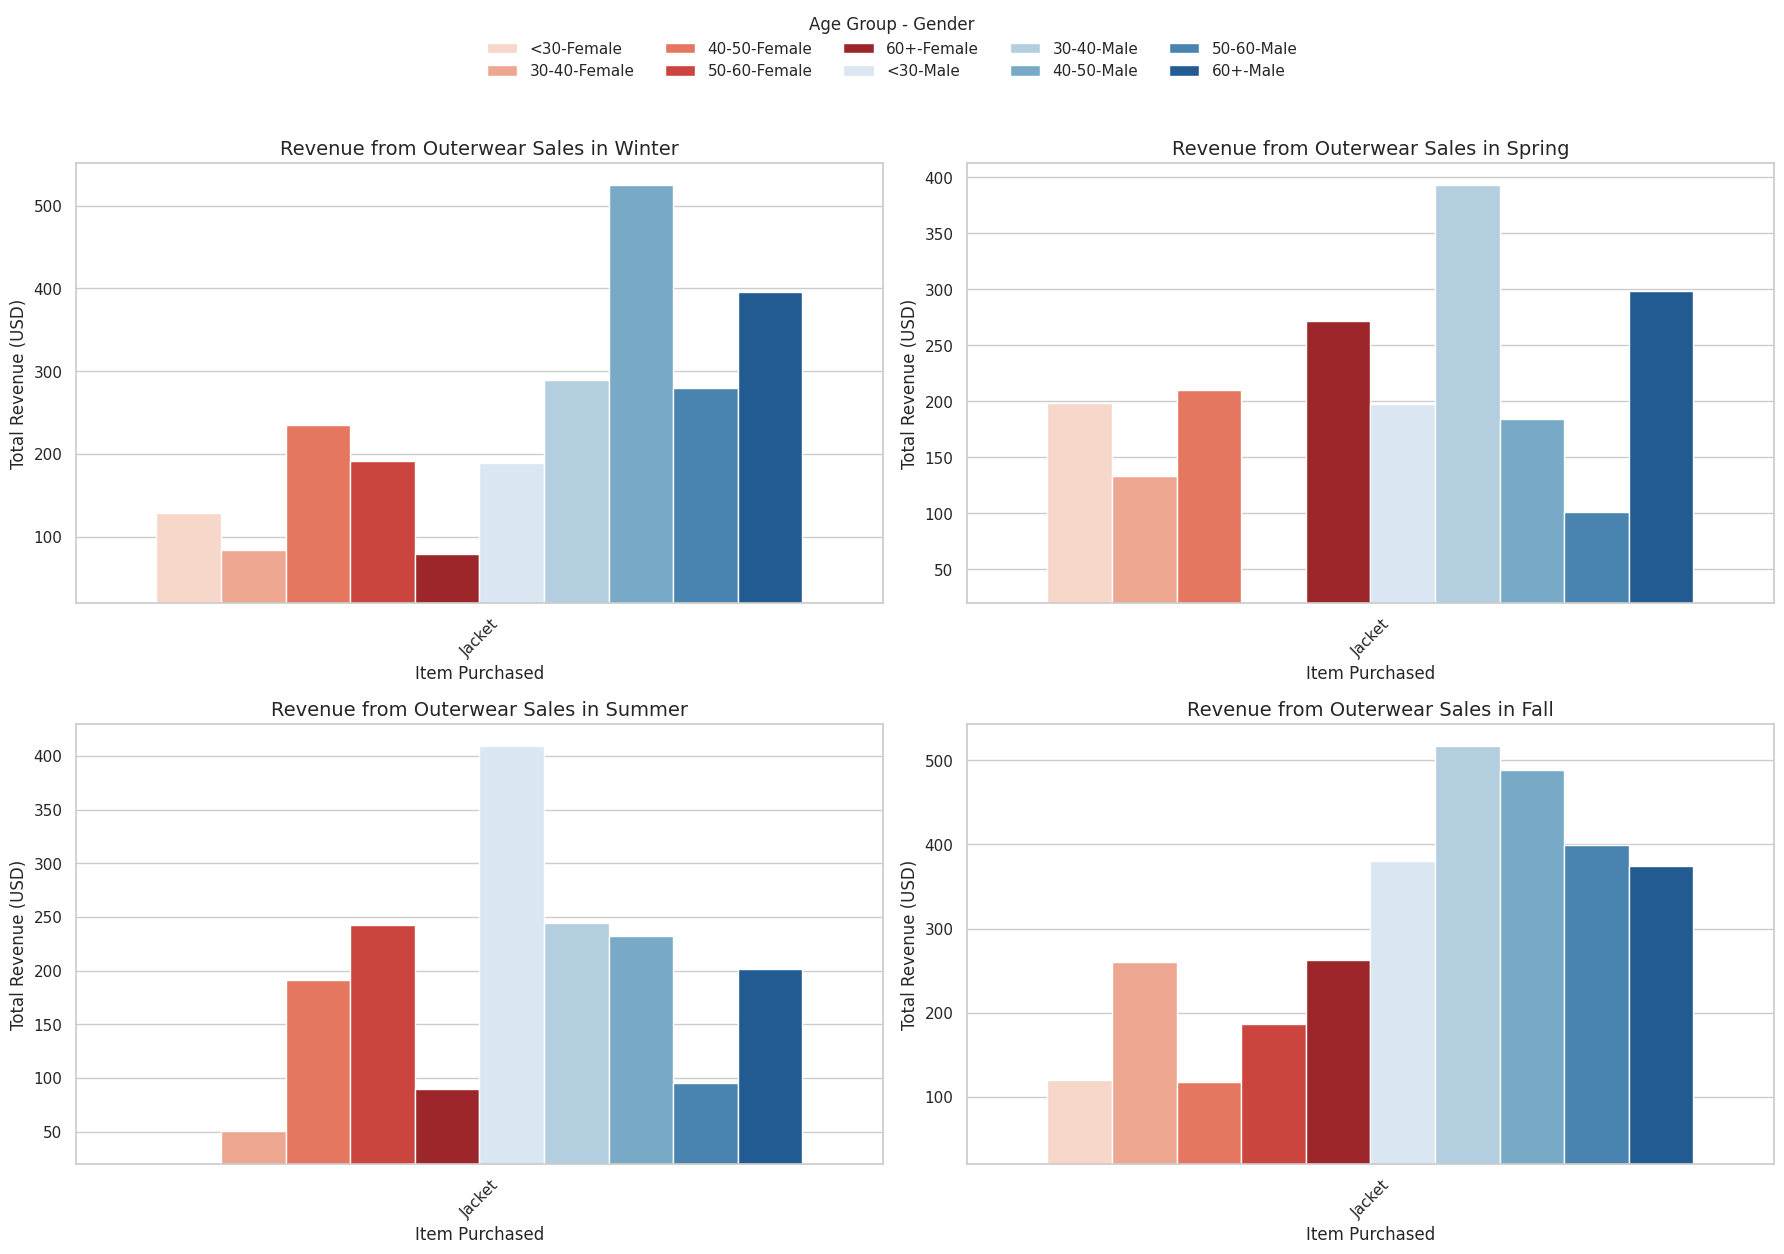

In [58]:
def plot_revenue_by_season(df_customer, category):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']

    selected_items = {
        'Clothing': ["Sweater", "Shirt", "T-shirt", "Hoodie", "Skirt"],
        'Accessories': ["Gloves", "Handbag", "Belt"],
        'Outerwear': ["Jacket"],
        'Footwear': []
    }

    age_gender_order = [
        '<30-Female', '30-40-Female', '40-50-Female', '50-60-Female', '60+-Female',
        '<30-Male', '30-40-Male', '40-50-Male', '50-60-Male', '60+-Male',
    ]

    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    axes = axes.flatten()

    female_colors = sns.color_palette("Reds", 5)
    male_colors = sns.color_palette("Blues", 5)

    color_mapping = {age_gender: female_colors[i] if 'Female' in age_gender else male_colors[i - 5]
                     for i, age_gender in enumerate(age_gender_order)}

    for i, season in enumerate(seasons):
        season_data = df_customer[
            (df_customer['season'] == season) &
            (df_customer['category'] == category) &
            (df_customer['item_purchased'].isin(selected_items.get(category, [])))
        ]

        season_data = season_data.copy()

        season_data['age_gender'] = season_data['age_group'].astype(str) + '-' + season_data['gender'].astype(str)

        season_data['age_gender'] = pd.Categorical(
            season_data['age_gender'], categories=age_gender_order, ordered=True
        )

        revenue_data = season_data.groupby(
            ['item_purchased', 'age_gender'], observed=False
        )['purchase_amount_(usd)'].sum().reset_index()

        sns.barplot(x='item_purchased', y='purchase_amount_(usd)', hue='age_gender',
                    data=revenue_data, dodge=True, ax=axes[i], palette=color_mapping)

        axes[i].set_title(f'Revenue from {category} Sales in {season}', fontsize=14)
        axes[i].set_xlabel('Item Purchased', fontsize=12)
        axes[i].set_ylabel('Total Revenue (USD)', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

        axes[i].set_ylim(20, None)

        axes[i].get_legend().remove()

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles, labels, title='Age Group - Gender',
        loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

=plot_revenue_by_season(df_customer, 'Clothing')
plot_revenue_by_season(df_customer, 'Accessories')
plot_revenue_by_season(df_customer, 'Outerwear')


## ⚪ Customer Segmentation

▶ Introduction

To categorize repurchase behavior, I divided customers into 3 groups based on their number of previous purchases:

- Low: Fewer than 13 purchases (below the 25th percentile).
- Medium: Between 13 and 38 purchases (25th to 75th percentile).
- High: More than 38 purchases (above the 75th percentile).


🔗 [Back to Data Visualization](#scrollTo=v0qL151JzeXV&line=1&uniqifier=1)


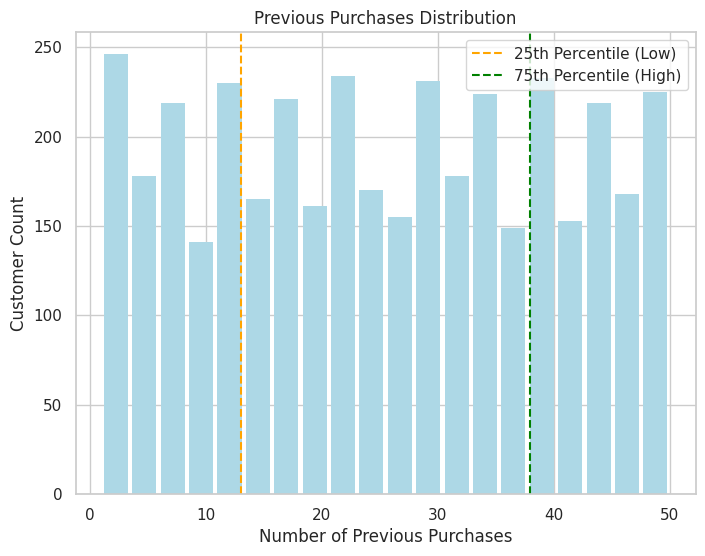

In [41]:
def repurchase_category(previous_purchases):
    if previous_purchases < 13:  # 25th percentile
        return "Low"
    elif previous_purchases <= 38:  # Between 25th and 75th percentile
        return "Medium"
    else:  # Greater than 75th percentile
        return "High"

plt.figure(figsize=(8, 6))

plt.hist(df_customer["previous_purchases"], bins=20, color="lightblue", edgecolor="none", rwidth=0.85)

plt.axvline(13, color="orange", linestyle="--", label="25th Percentile (Low)")
plt.axvline(38, color="green", linestyle="--", label="75th Percentile (High)")

plt.title("Previous Purchases Distribution")
plt.xlabel("Number of Previous Purchases")
plt.ylabel("Customer Count")

plt.legend()

plt.show()


In [42]:
#Repurchase Category Count/ Mean/ Sum

df_customer["repurchase_category"] = df_customer["previous_purchases"].apply(repurchase_category)

print(df_customer["repurchase_category"].value_counts())

purchase_amount_by_category = df_customer.groupby("repurchase_category")["purchase_amount_(usd)"].agg(["mean", "sum"])

# Display the result
print(purchase_amount_by_category)

repurchase_category
Medium    2027
Low        945
High       928
Name: count, dtype: int64
                          mean     sum
repurchase_category                   
High                 59.975216   55657
Low                  60.448677   57124
Medium               59.348791  120300


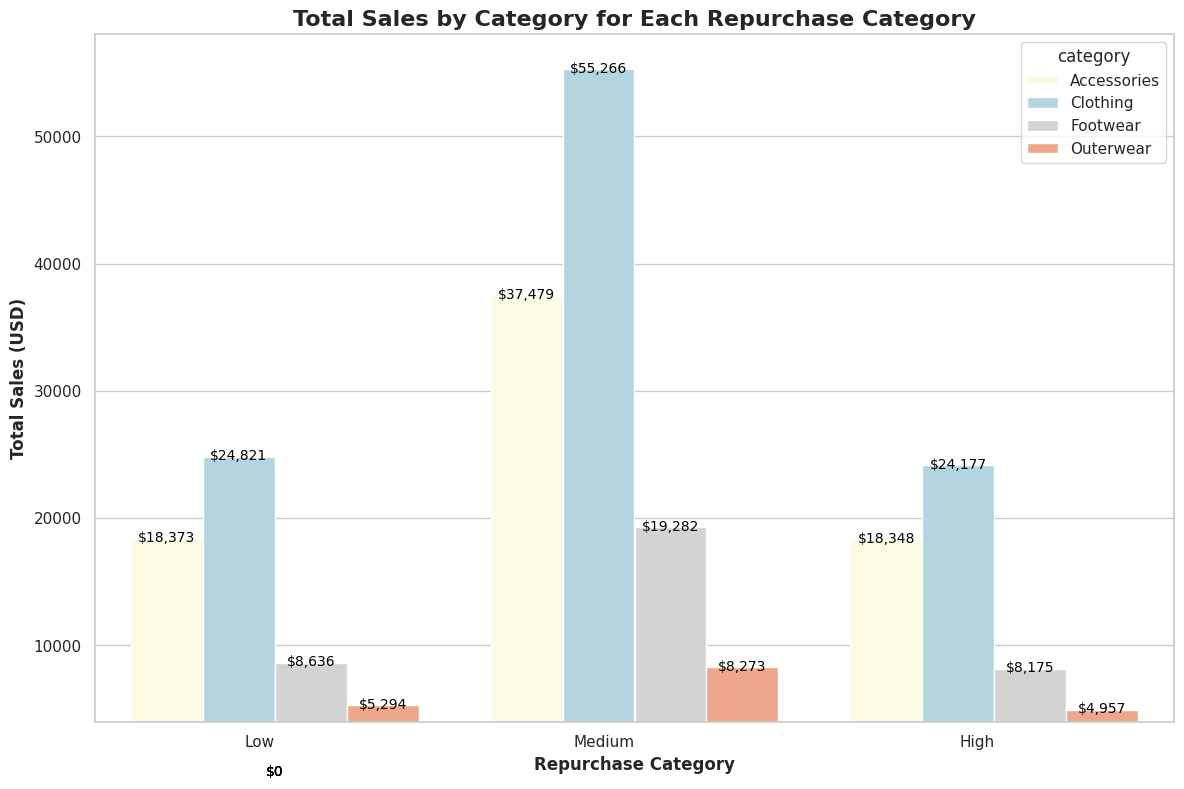

In [43]:
category_colors = {
    'Clothing': "#ADD8E6",  # Pastel Blue
    'Accessories': "#FFFFE0",  # Pastel Yellow
    'Outerwear': "#FFA07A",  # Pastel Orange
    'Footwear': "#D3D3D3"  # Pastel Grey
}

category_sales_stats = (
    df_customer.groupby(["repurchase_category", "category"])['purchase_amount_(usd)']
    .sum()
    .reset_index(name='total_sales')
)

plt.figure(figsize=(12, 8))

sns.barplot(x='repurchase_category', y='total_sales', hue='category', data=category_sales_stats,
            palette=category_colors, order=['Low', 'Medium', 'High'])

plt.title('Total Sales by Category for Each Repurchase Category', fontsize=16, weight='bold')
plt.xlabel('Repurchase Category', fontsize=12, weight='bold')
plt.ylabel('Total Sales (USD)', fontsize=12, weight='bold')

plt.ylim(bottom=4000)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = height + 50

    plt.text(
        x_position,
        y_position,
        f"${int(height):,}",
        ha="center",
        va="center",
        fontsize=10,
        color='black'
    )

plt.xticks(rotation=0, ha='right')

plt.tight_layout()

plt.show()


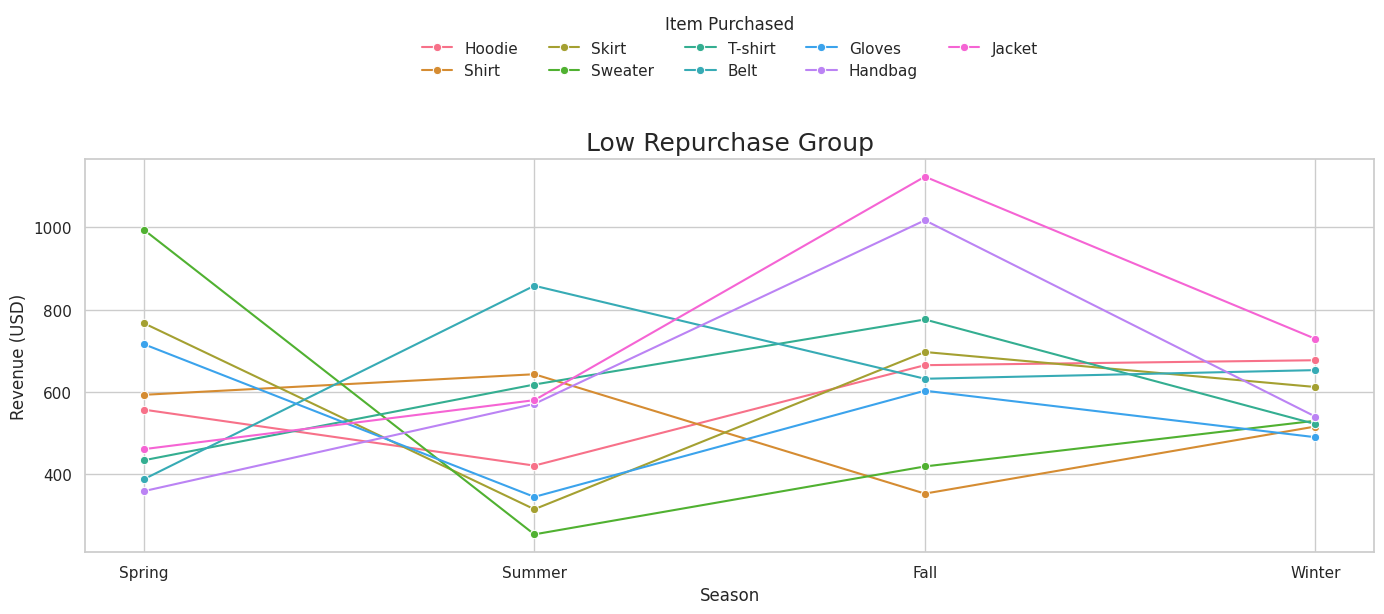

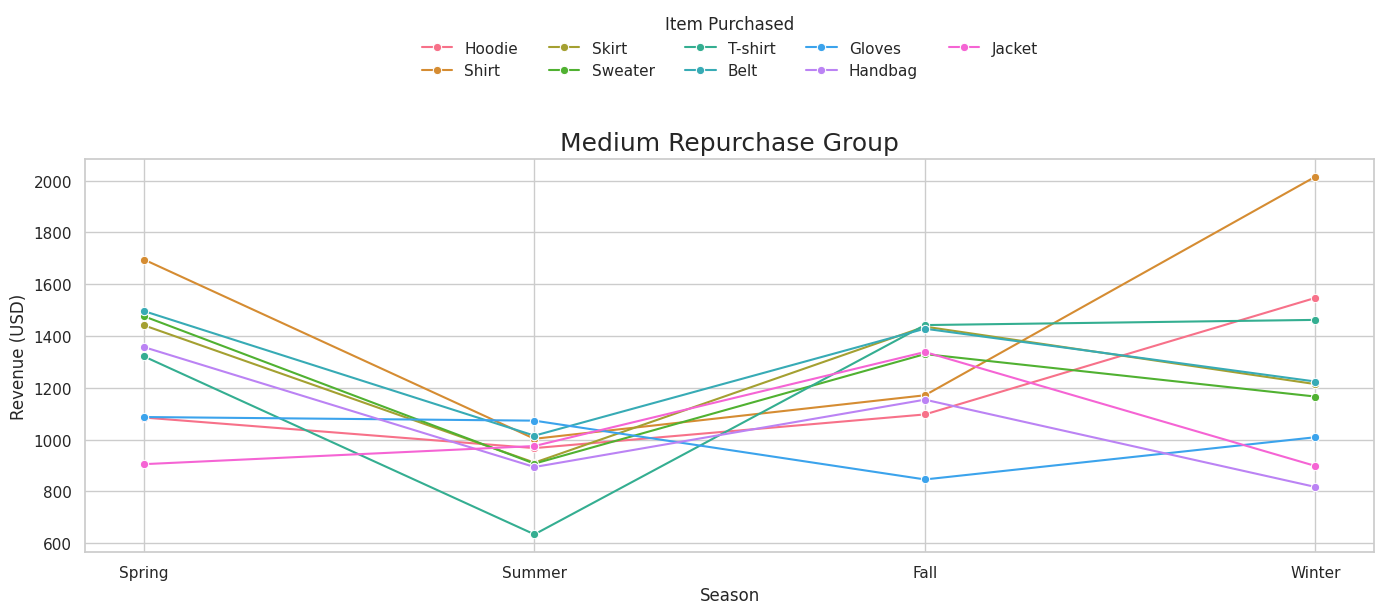

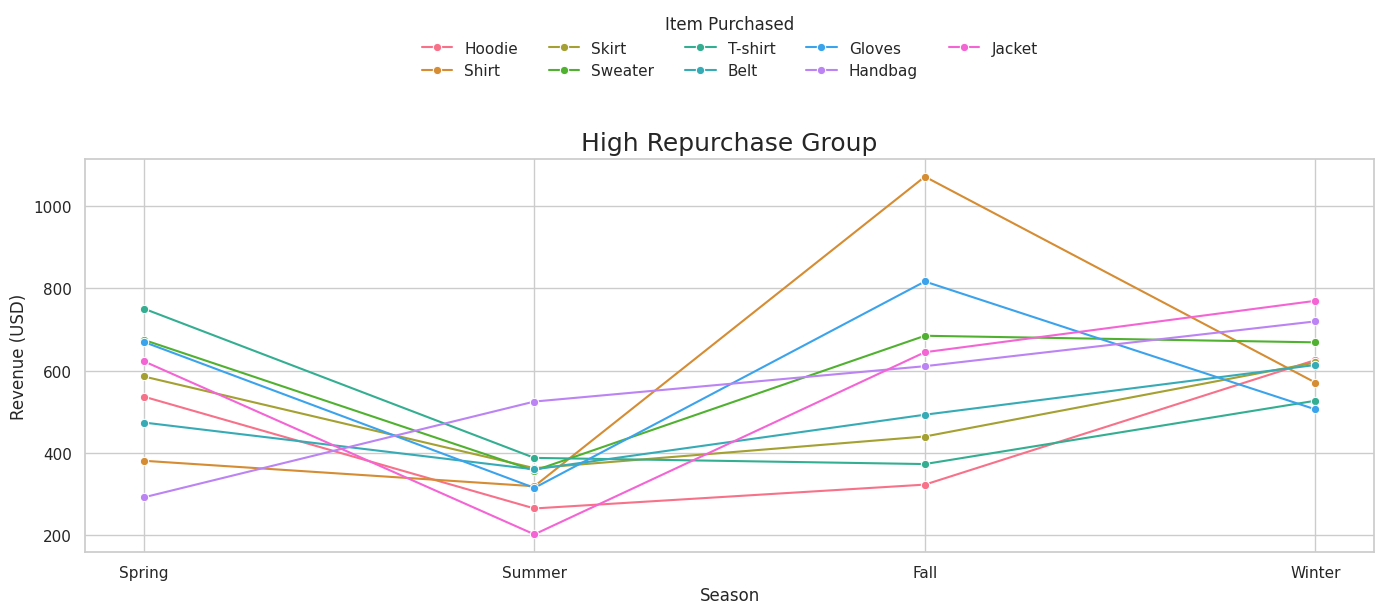

In [66]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
repurchase_groups = ['Low', 'Medium', 'High']

color_palette = sns.color_palette("husl", n_colors=9)

items_to_consider = ['Hoodie', 'Shirt', 'Skirt', 'Sweater', 'T-shirt', 'Belt', 'Gloves', 'Handbag', 'Jacket']

for repurchase_group in repurchase_groups:
    filtered_data = df_customer[df_customer['repurchase_category'] == repurchase_group]

    filtered_data = filtered_data[filtered_data['item_purchased'].isin(items_to_consider)]

    seasonal_data = (
        filtered_data.groupby(['season', 'item_purchased'])['purchase_amount_(usd)']
        .sum()
        .reset_index(name='revenue')
    )

    seasonal_data['item_purchased'] = pd.Categorical(seasonal_data['item_purchased'], categories=items_to_consider, ordered=True)

    seasonal_data['season'] = pd.Categorical(seasonal_data['season'], categories=seasons, ordered=True)

    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(
        data=seasonal_data,
        x='season',
        y='revenue',
        hue='item_purchased',
        marker='o',
        palette=color_palette
    )

    plt.title(f'{repurchase_group} Repurchase Group', fontsize=18)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Revenue (USD)', fontsize=12)

    handles, labels = ax.get_legend_handles_labels()
    filtered_handles_labels = [(handle, label) for handle, label in zip(handles, labels) if label in seasonal_data['item_purchased'].unique()]
    filtered_handles, filtered_labels = zip(*filtered_handles_labels)

    plt.legend(
        filtered_handles, filtered_labels, title='Item Purchased',
        loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=5, frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


## ⚪ Hypothesis & Validation

🔗 [Back to Data Visualization](#scrollTo=v0qL151JzeXV&line=1&uniqifier=1)


T-Test Results for Hoodie, Sweater, and Gloves:
T-statistic: -3.05, p-value: 0.0379
The sales differences between summer and winter are statistically significant (p < 0.05).


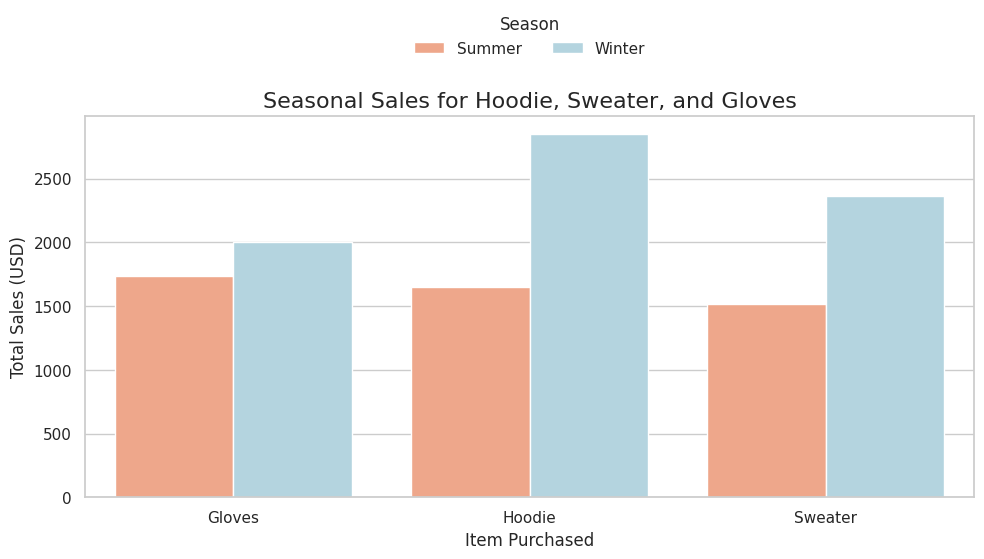

In [76]:
filtered_data = df_customer[
    (df_customer['item_purchased'].isin(['Hoodie', 'Sweater', 'Gloves'])) &
    (df_customer['season'].isin(['Summer', 'Winter']))
]

product_sales = filtered_data.groupby(['item_purchased', 'season'])['purchase_amount_(usd)'].sum().reset_index()

pivoted_sales = product_sales.pivot(index='item_purchased', columns='season', values='purchase_amount_(usd)').reset_index()

pivoted_sales = pivoted_sales.fillna(0)

summer_sales = pivoted_sales['Summer']
winter_sales = pivoted_sales['Winter']

t_stat, p_value = ttest_ind(summer_sales, winter_sales)

print("T-Test Results for Hoodie, Sweater, and Gloves:")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The sales differences between summer and winter are statistically significant (p < 0.05).")
else:
    print("No significant sales differences between summer and winter (p >= 0.05).")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=product_sales,
    x="item_purchased",
    y="purchase_amount_(usd)",
    hue="season",
    palette=["#ffa07a", "#add8e6"]  # Light salmon for Summer, Light blue for Winter
)
plt.title("Seasonal Sales for Hoodie, Sweater, and Gloves", fontsize=16)
plt.xlabel("Item Purchased", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=0)

plt.legend(title="Season", loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

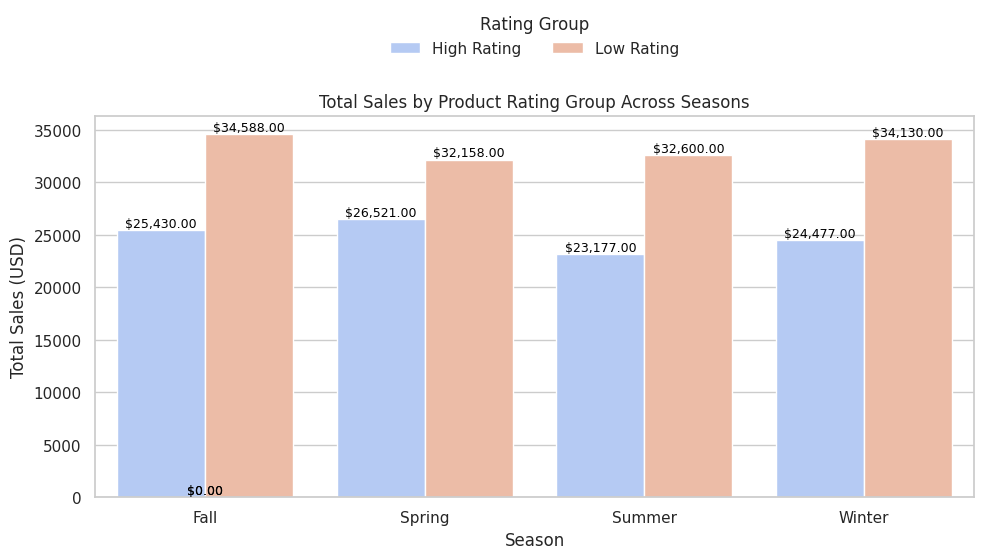

Season: Winter
  T-statistic: 0.760
  P-value: 0.448
  No statistically significant difference in sales between high and low-rated products.
Season: Spring
  T-statistic: 0.549
  P-value: 0.583
  No statistically significant difference in sales between high and low-rated products.
Season: Summer
  T-statistic: 1.284
  P-value: 0.200
  No statistically significant difference in sales between high and low-rated products.
Season: Fall
  T-statistic: 1.198
  P-value: 0.231
  No statistically significant difference in sales between high and low-rated products.


In [78]:
df_customer['rating_group'] = df_customer['review_rating'].apply(
    lambda x: 'High Rating' if x >= 4 else 'Low Rating'
)

sales_by_season = df_customer.groupby(['season', 'rating_group'])['purchase_amount_(usd)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_season, x='season', y='purchase_amount_(usd)', hue='rating_group', palette='coolwarm')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Sales by Product Rating Group Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Sales (USD)')

plt.legend(title='Rating Group', loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

seasons = df_customer['season'].unique()
for season in seasons:
    df_season = df_customer[df_customer['season'] == season]
    high_rating_sales = df_season[df_season['rating_group'] == 'High Rating']['purchase_amount_(usd)']
    low_rating_sales = df_season[df_season['rating_group'] == 'Low Rating']['purchase_amount_(usd)']

    t_stat, p_value = ttest_ind(high_rating_sales, low_rating_sales)
    print(f"Season: {season}")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("  High-rated products lead to statistically significantly higher sales.")
    else:
        print("  No statistically significant difference in sales between high and low-rated products.")


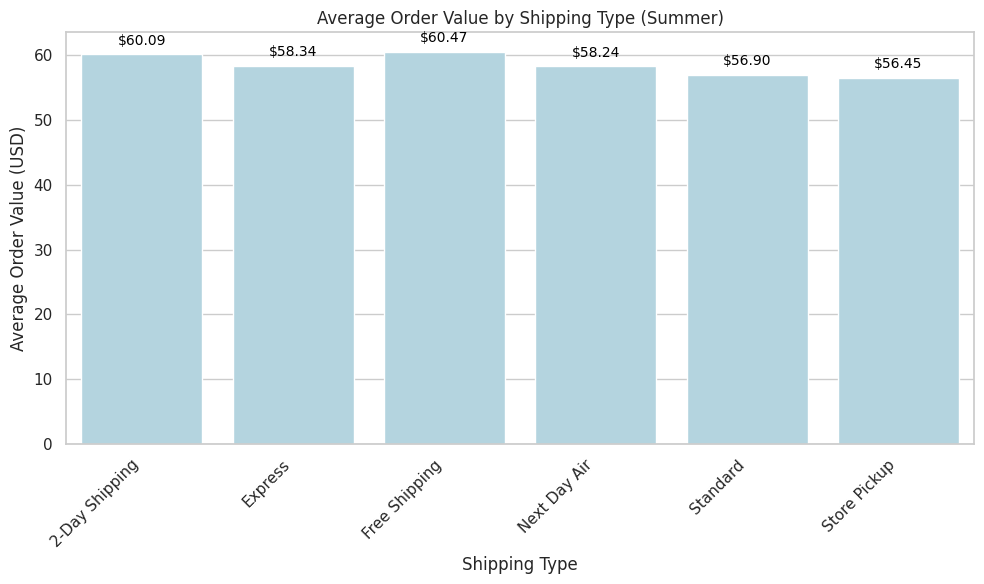

T-statistic (Summer): 1.309
P-value (Summer): 0.191
There is no statistically significant difference in AOV between Free Shipping and other shipping types in summer.


In [47]:
summer_data = df_customer[df_customer['season'] == 'Summer']

aov_shipping_type_summer = summer_data.groupby('shipping_type')['purchase_amount_(usd)'].mean().reset_index(name='AOV')

plt.figure(figsize=(10, 6))
sns.barplot(data=aov_shipping_type_summer, x='shipping_type', y='AOV', color='lightblue')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Average Order Value by Shipping Type (Summer)')
plt.xlabel('Shipping Type')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

free_shipping_aov_summer = summer_data[summer_data['shipping_type'] == 'Free Shipping']['purchase_amount_(usd)']
other_shipping_aov_summer = summer_data[summer_data['shipping_type'] != 'Free Shipping']['purchase_amount_(usd)']

from scipy.stats import ttest_ind
t_stat_summer, p_value_summer = ttest_ind(free_shipping_aov_summer, other_shipping_aov_summer)

print(f"T-statistic (Summer): {t_stat_summer:.3f}")
print(f"P-value (Summer): {p_value_summer:.3f}")

if p_value_summer < 0.05:
    print("Free Shipping leads to a statistically significant higher AOV in summer.")
else:
    print("There is no statistically significant difference in AOV between Free Shipping and other shipping types in summer.")


Chi-Square Statistic: 0.19
P-value: 0.9105
Degrees of Freedom: 2
Expected Frequencies:
[[43.03998094 56.96001906]
 [43.03998094 56.96001906]
 [43.03998094 56.96001906]]
No statistically significant relationship between repurchase category and promo code usage (p >= 0.05).


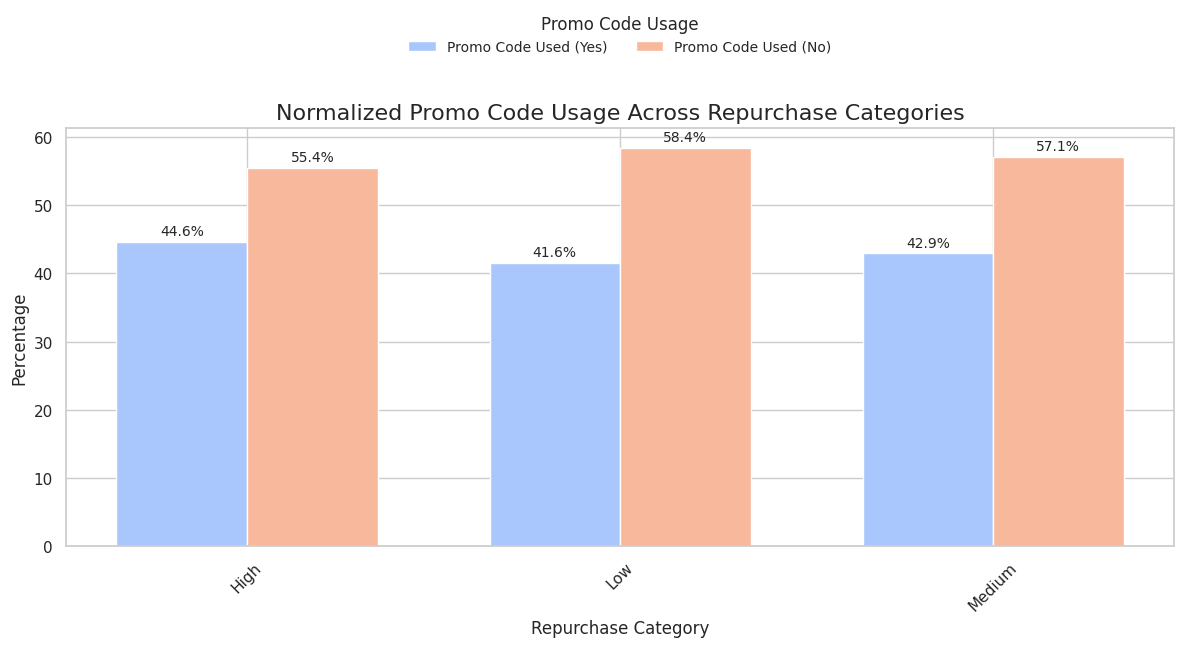

In [83]:

contingency_table = repurchase_promo_usage[['Yes (%)', 'No (%)']]

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p_value < 0.05:
    print("There is a statistically significant relationship between repurchase category and promo code usage (p < 0.05).")
else:
    print("No statistically significant relationship between repurchase category and promo code usage (p >= 0.05).")

categories = repurchase_promo_usage.index
yes_percent = repurchase_promo_usage['Yes (%)']
no_percent = repurchase_promo_usage['No (%)']

bar_width = 0.35
x = np.arange(len(categories))

palette = sns.color_palette("coolwarm", 2)

plt.figure(figsize=(12, 7))
bars_yes = plt.bar(x - bar_width / 2, yes_percent, bar_width, label='Promo Code Used (Yes)', color=palette[0])
bars_no = plt.bar(x + bar_width / 2, no_percent, bar_width, label='Promo Code Used (No)', color=palette[1])

plt.title('Normalized Promo Code Usage Across Repurchase Categories', fontsize=16)
plt.xlabel('Repurchase Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(x, categories, rotation=45)

plt.legend(title='Promo Code Usage', loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fontsize=10, frameon=False)

for bar in bars_yes:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', fontsize=10)

for bar in bars_no:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
